In [31]:
from delay_control import *
import numpy as np
import matplotlib.pyplot as plt
import control as ctrl
from matplotlib import rcParams

rcParams = {
    "figure.figsize": (7, 7),
    "axes.grid": True,
    "font.size": 10,
    "font.family": "serif",
    "grid.alpha": 0.3,
    "grid.linestyle": "--",
    # "text.usetex": True, # Uncomment if LaTeX is installed
}
# plt.style.use("dark_background")

plt.rcParams.update(rcParams)

Lets implement the following test scenario:

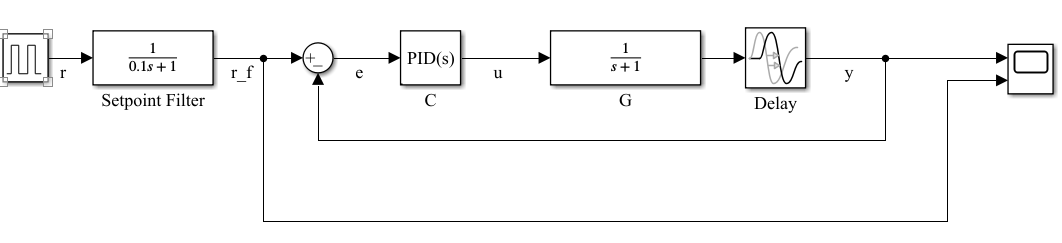

In [32]:
s = ctrl.TransferFunction.s
G = 1 / (s + 1)  # plant transfer function
delay = 0.1  # Delay in seconds
SF = 1 / (0.1 * s + 1)  # set-point filter
C = 5 + 10 / s  # PI controller
dt = 0.001  # time step for simulation

Creating Class objects for Plant, Controller and Set-point Filter

In [33]:
plant = DelayControlSystem(G, delay, dt=dt)
controller = DelayControlSystem(C, 0, dt=dt)
set_point_filter = DelayControlSystem(SF, 0, dt=dt)

Resetting all systems before simulation

In [34]:
plant.reset()
controller.reset()
set_point_filter.reset()

Simulation parameters

In [35]:
sim_time = 20  # seconds
time_steps = int(sim_time / plant.dt)
time = np.linspace(0, sim_time, time_steps)
f = 0.05  # frequency of reference signal in Hz
ref_signal = (
    np.sign(np.sin(2 * np.pi * f * time)) + 1
) / 2  # square wave reference signal
y = 0
error = np.array([0])

Simulating the closed-loop system with delay

In [36]:
for i, t in enumerate(time):
    _, r_f, _ = set_point_filter.step(ref_signal[i])
    error = np.append(error, r_f - y)  # sum block for error calculation
    _, u, _ = controller.step(error[-1])
    u = np.clip(u, -10, 10)  # actuator saturation
    _, y, _ = plant.step(u)

Plotting the results

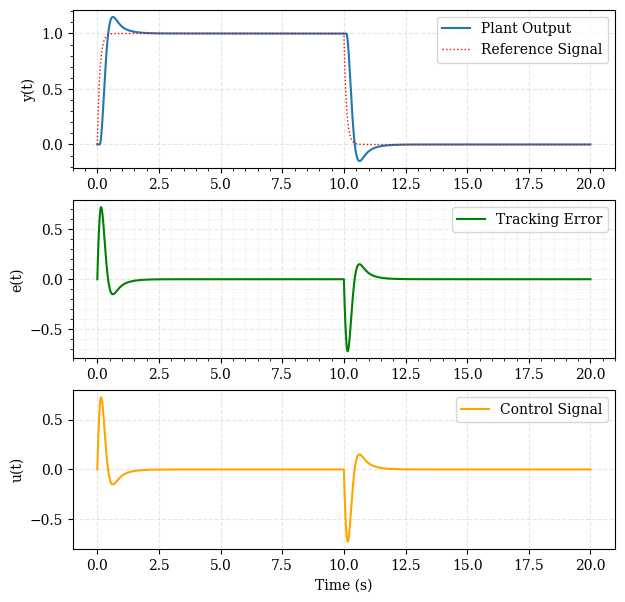

In [37]:
plt.subplot(3, 1, 1)
plt.plot(plant.t, plant.y, label="Plant Output")
plt.plot(plant.t, set_point_filter.y, "r:", label="Reference Signal", linewidth=1)
plt.ylabel("y(t)")
plt.legend()
plt.minorticks_on()
plt.grid(True, which="major", alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(plant.t, error, label="Tracking Error", color="green")
plt.ylabel("e(t)")
plt.minorticks_on()
plt.grid(True, which="minor", alpha=0.15)
plt.legend()
plt.grid(True, which="major", alpha=0.3)


plt.subplot(3, 1, 3)
plt.plot(controller.t, controller.u, label="Control Signal", color="orange")
plt.xlabel("Time (s)")
plt.ylabel("u(t)")
plt.legend()
plt.show()